Ideas:
1. Simple threshold
2. Gradient (instead of simple threshold, look at gradient threshold)
3. Contrast stretching (to make thresholds less sensitive)
4. ???
5. ???

In [1]:
import numpy as np
from skimage.morphology import erosion, dilation, binary_erosion, opening, closing, white_tophat, reconstruction, black_tophat, skeletonize, convex_hull_image, thin, extrema
from skimage.morphology import square, diamond, octagon, rectangle, star, disk, label
from skimage.segmentation import watershed
from skimage import exposure
from skimage.filters.rank import entropy, enhance_contrast_percentile
from skimage import color
from PIL import Image
from scipy import ndimage as ndi
from skimage.util import img_as_ubyte
import math
from skimage import data, filters
from matplotlib import pyplot as plt

from script_tp2 import *

# 0. Preprocessing

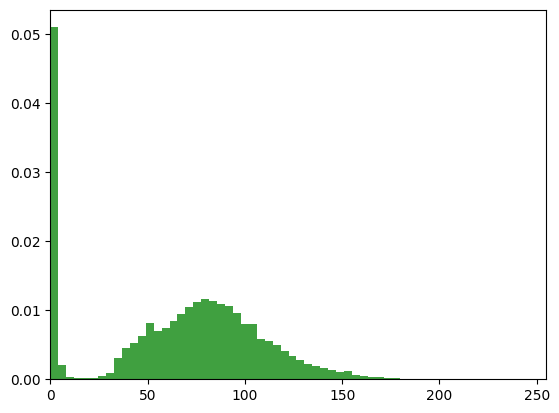

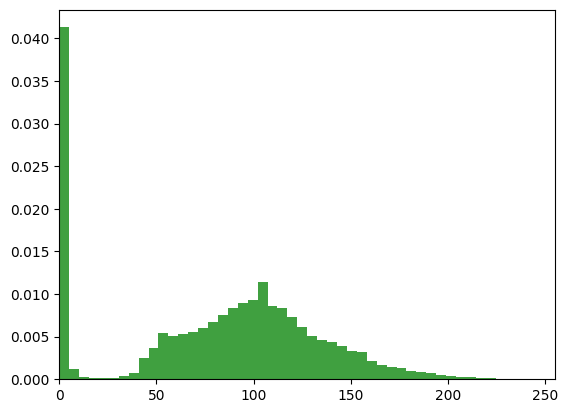

In [2]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_mask = masking(img)
plt.hist(img.ravel(), 50, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 255])
plt.show()

# rescale image
img_rescaled = img
img_rescaled[img_mask == 1] = exposure.rescale_intensity(img[img_mask == 1])
plt.hist(img_rescaled.ravel(), 50, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 255])
plt.show()


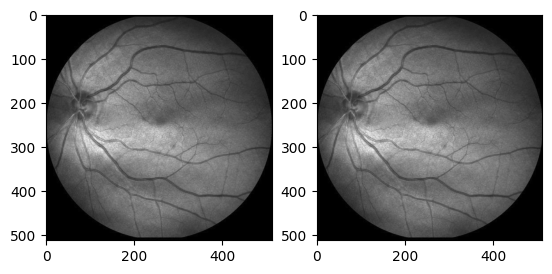

In [3]:
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_rescaled, cmap='grey')

# 1. Simple Threshold

In [4]:
def simple_threshold(img, threshold):
    img_mask = masking(img)
    img_rescaled[img_mask == 1] = exposure.rescale_intensity(img[img_mask == 1])
    img_out = (img_mask & (img_rescaled < threshold))
    return img_out

Precision = 17.30%, Recall = 66.81%, F1 Score = 27.48%


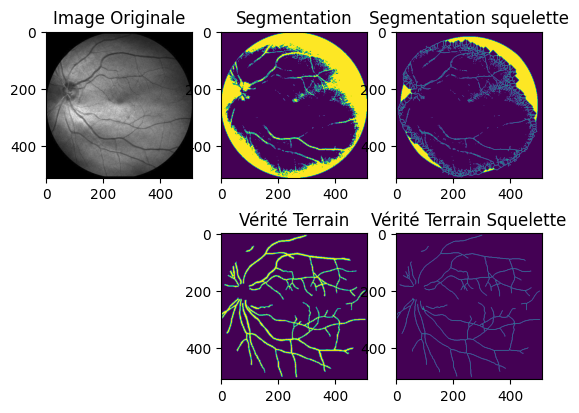

(0.17300413237490017, 0.6680970899825667, 0.2748386384950626)

In [5]:
evaluate_picture('01', simple_threshold, 90, plotting = True)

/Users/olivierlapabe/Documents/MS IA Telecom Paris/P2/IA716 - Computer Vision/02_TPs/TP2/script_tp2.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  F1SCORE = 2 / (1/PRECIS + 1/RECALL)


optimal threshold =  90


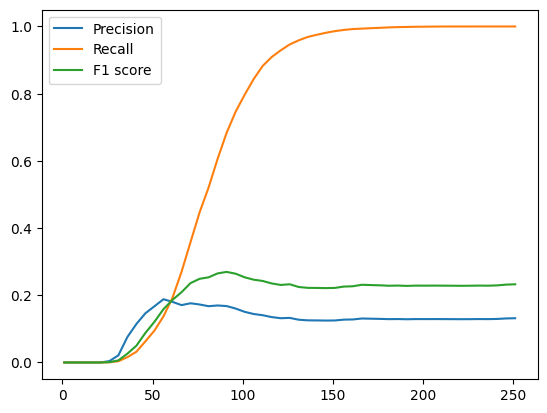

In [6]:
# Plot optimal threshold

threshold_range_01 = range(1, 256, 5)
scores_01 = []

for i in threshold_range_01:
    scores_01.append(evaluate_picture('01', simple_threshold, i, plotting = False, printing = False))

precision_01, recall_01, f1score_01 = zip(*[(t[0], t[1], t[2]) for t in scores_01])

print("optimal threshold = ", np.argmax(f1score_01)*5)

plt.plot(threshold_range_01, precision_01, label= 'Precision')
plt.plot(threshold_range_01, recall_01, label= 'Recall')
plt.plot(threshold_range_01, f1score_01, label= 'F1 score')
plt.legend()
plt.show()

In [7]:
from skimage.filters import threshold_otsu

def threshold_segm(image):
    thresh = threshold_otsu(image)
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()

# 2. Erosion segmentation

In [8]:
def seg_erosion(img, disk_size, threshold):
    img_mask = masking(img)
    img_erosion = erosion(img, disk(disk_size))
    img_out = (img_mask & (img_erosion < threshold))
    return img_out

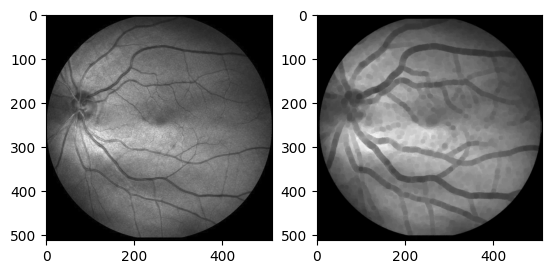

In [9]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_out = erosion(img, disk(5))
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_out, cmap='grey')

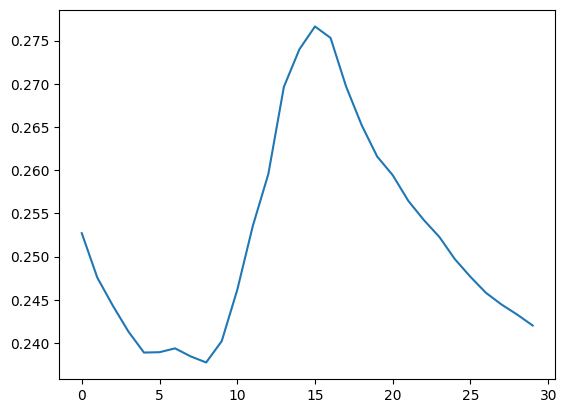

In [10]:
f1score_erosion = []
for i in range(30):
    f1score_erosion.append(evaluate_picture('01', seg_erosion, i, 80, plotting = False, printing = False)[2])

plt.plot(range(30), f1score_erosion)

# 3. Dilation segmentation

In [11]:
def seg_dilation(img, disk_size, threshold):
    img_mask = masking(img)
    img_dilation = dilation(img, disk(disk_size))
    img_out = (img_mask & (img_dilation < threshold))
    return img_out

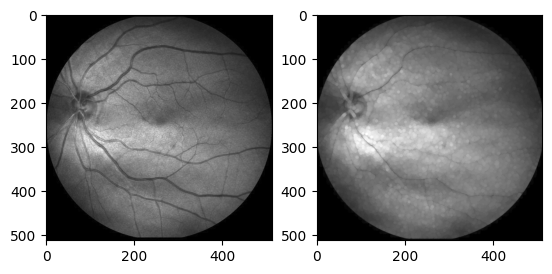

In [12]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_out = dilation(img, disk(3))
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_out, cmap='grey')

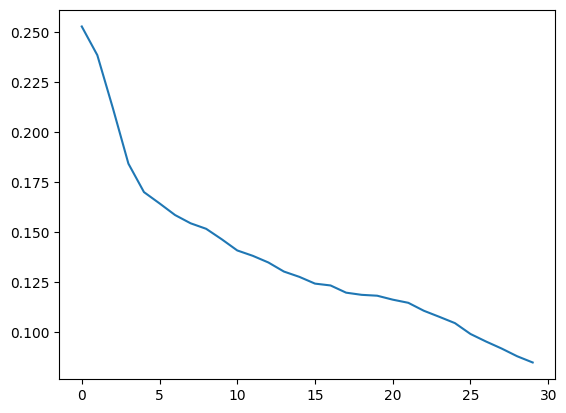

In [13]:
f1score_dilation = []
for i in range(30):
    f1score_dilation.append(evaluate_picture('01', seg_dilation, i, 80, plotting = False, printing = False)[2])

plt.plot(range(30), f1score_dilation)

# 4. Opening segmentation

In [14]:
def seg_opening(img, disk_size, threshold):
    img_mask = masking(img)
    img_opening = opening(img, disk(disk_size))
    img_out = (img_mask & (img_opening < threshold))
    return img_out

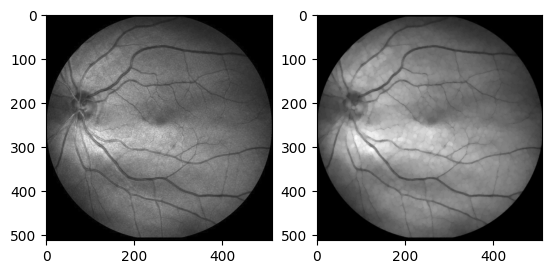

In [15]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_out = opening(img, disk(3))
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_out, cmap='grey')

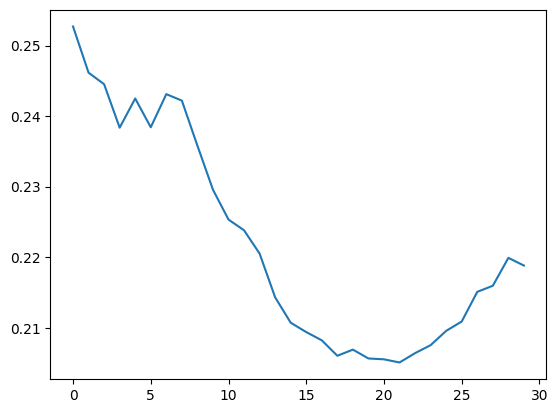

In [16]:
f1score_opening = []
for i in range(30):
    f1score_opening.append(evaluate_picture('01', seg_opening, i, 80, plotting = False, printing = False)[2])

plt.plot(range(30), f1score_opening)

# 4. Closing segmentation

In [17]:
def seg_closing(img, disk_size, threshold):
    img_mask = masking(img)
    img_closing = closing(img, disk(disk_size))
    img_out = (img_mask & (img_closing < threshold))
    return img_out

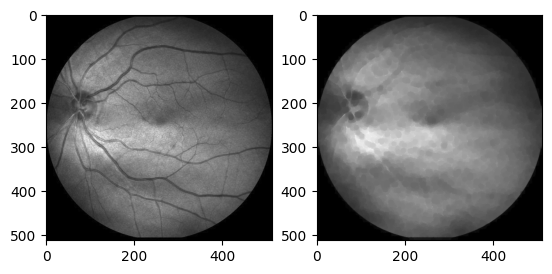

In [18]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_out = closing(img, disk(5))
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_out, cmap='grey')

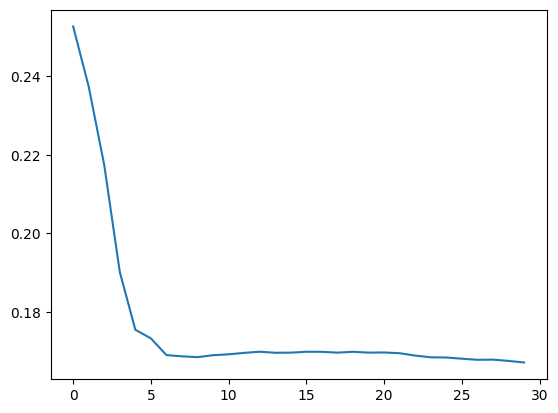

In [19]:
f1score_closing = []
for i in range(30):
    f1score_closing.append(evaluate_picture('01', seg_closing, i, 80, plotting = False, printing = False)[2])

plt.plot(range(30), f1score_closing)

# 4. Morphological gradient

In [20]:
def seg_gradient(img, disk_size, threshold):
    img_mask = masking(img)
    img_gradient = dilation(img, disk(disk_size)) - erosion(img, disk(disk_size))
    img_out = (img_mask & (img_gradient < threshold))
    return img_out

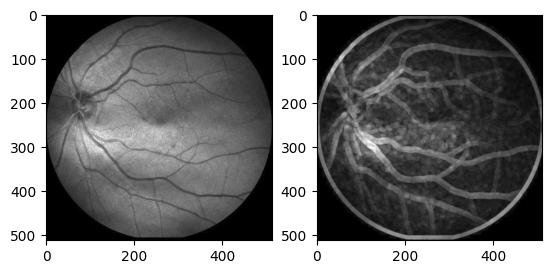

In [21]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_out = dilation(img, disk(5)) - erosion(img, disk(5))
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_out, cmap='grey')

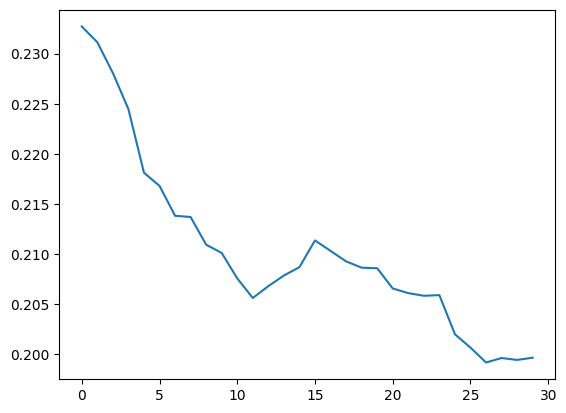

In [22]:
f1score_gradient = []
for i in range(30):
    f1score_gradient.append(evaluate_picture('01', seg_gradient, i, 80, plotting = False, printing = False)[2])

plt.plot(range(30), f1score_gradient)

# 5. Watershed segmentation

In [23]:
def contrasted_watershed(grad,threshold=0.01):
    # description
    # this code will calculate watershed of the most constrasted area
    # input :image gradient
    # input :contrast of the local minima that we discard
    # output : labels_waterhed an image with a label by cluster
    grad = grad - np.amin(grad)
    grad = grad / np.amax(grad)
    local_minima = extrema.h_minima(grad, threshold)
    #Image.fromarray(255 * local_minima).show('local minima')

    seeds = label(local_minima)#, neighbors=4)

    #local_minima = local_minima.astype(np.uint8)
    labels_waterhed = watershed(grad, seeds)
    return labels_waterhed

In [24]:
image =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
gradient = dilation(image, disk(3))-erosion(image, disk(3))
labels_watershed = contrasted_watershed(gradient,threshold=0.1)

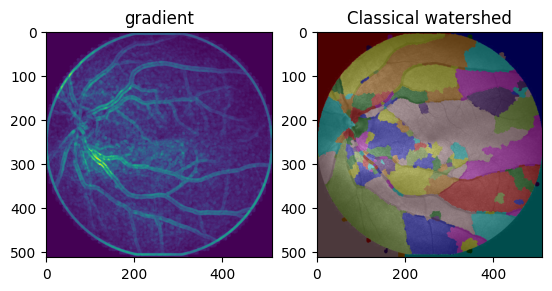

In [25]:
fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(gradient)
ax0.set_title('gradient')

ax1.imshow(color.label2rgb(labels_watershed, image, bg_label=-1))
ax1.set_title('Classical watershed')

plt.show()